In [29]:
from scipy.stats import gamma
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [39]:
'''
SVR for R3
'''
good_dist = [3.1278055555555186e-05, 0.00017508222222219604, 0.00019929805555558307, 0.00016982194444445744, 0.00022095416666659577, 0.0005823713888889496, 0.00036942638888881564, 0.0002716672222222011, 5.336166666658612e-05, 0.0003387827777777651, 0.00047348749999992805, 1.69719444444473e-05, 0.0005182777777777881, 0.0012307880555556048, 3.5283333333297265e-05, 0.0004910744444443955, 6.473111111108404e-05, 0.0004842077777777562, 6.0324999999949655e-06, 0.001056786666666683, 0.0006162638888889192, 0.00042193555555565705, 0.0005175588888888085, 0.0004308902777777801, 0.000667810833333306, 8.87286111112078e-05, 0.0006318947222223236, 0.00010151527777776991, 0.0010628411111111246, 0.0002922966666666464, 0.0003427233333333018, 0.00034550083333337376, 2.365055555554694e-05, 0.00022924000000002761, 0.00021091499999995885, 9.693611111095555e-06, 2.437777777777769e-05, 7.69300000000153e-05, 3.060000000019937e-06, 3.8311111111153365e-05, 4.491888888892803e-05, 1.817111111109427e-05, 5.042972222221274e-05, 4.7030833333339754e-05, 3.925027777779959e-05, 1.5491666666569515e-06, 3.4402222222229666e-05, 2.9669444444351862e-06, 3.5772222222237088e-06, 2.3725000000007875e-06, 4.205555555559223e-06, 2.2422222222135885e-06, 7.444789686040499e-07, 1.9857181087651625e-06, 1.7058573779617914e-06, 1.1960384942281307e-06, 1.2336452675805288e-06, 7.571889265442034e-07, 3.3803849131813943e-06, 9.419660684150468e-07, 7.047542686508941e-07, 5.860402787845723e-06, 8.293513895518748e-07, 2.6422914295242637e-06, 3.0455309982179677e-06, 7.190745542932566e-07, 1.8562079875208443e-06, 3.815986795636423e-06, 4.185368726106598e-06, 5.025944490207878e-06, 2.0642881372964517e-06, 3.382421483368917e-07, 4.10148385908721e-06, 4.6118897503646165e-07, 3.214521081050701e-06]
bad_dist = [4.2578611111114374e-05, 0.00022348194444441656, 0.000394265000000031, 0.0003568136111111366, 0.0002275433333332787, 0.00033300194444445025, 0.0013613349999999727, 0.0010946994444445111, 0.0005873833333333331, 0.000566618888888891, 0.0014144408333334447, 0.0011557183333332985, 0.00015588777777771849, 0.0010455502777777788, 0.0008078891666666657, 0.004262719166666723, 0.004886021388888922, 0.004966783055555641, 0.0075724877777778215, 0.011211452222222267, 0.012852988333333348, 0.00924565055555562, 0.01162099888888905, 0.010943453055555587, 0.013537876666666726, 0.02007606305555555, 0.020704492222222263, 0.016763036944444476, 0.020554126388889, 0.024706171944444508, 0.02667477416666677, 0.023977447222222295, 0.025459899444444493, 0.026478816111111237, 0.028746075555555656, 0.027899713611111175, 0.030581870277777937, 0.033252708055555684, 0.0313271180555557, 0.03225263416666681, 0.03335149916666685, 0.03504513138888904, 0.03547064777777795, 0.035558724722222386, 0.03503728888888909, 0.03553371527777794, 0.03659488194444458, 0.036251160000000136, 0.03659306111111126, 0.03685031416666689, 0.036685553611111324, 0.03751320305555573, 0.03752953765884154, 0.037481702904108065, 0.03783653528518972, 0.03774716748937641, 0.03829568356068549, 0.03842590928831948, 0.03837932819668393, 0.0386202369052254, 0.038524831254355976, 0.03939090257924551, 0.03911030933878436, 0.039161406739890284, 0.0394955733199341, 0.039293501665089874, 0.03959084850060446, 0.03986943507638737, 0.03952882269546101, 0.03960904872558827, 0.039556432813707514, 0.040308950050069535, 0.040958098644492, 0.04053505104070951, 0.04170764181167041]
print(len(good_dist))
print(len(bad_dist))

75
75


shape  0.4217767211984525
scale 0.0004181596240585937

shape  2.4692670145669906
scale 0.009837006754051301


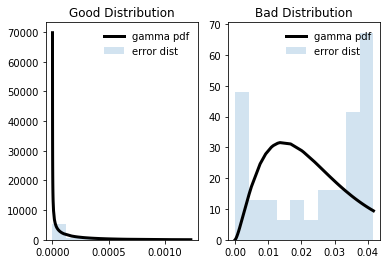

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

x = sorted(good_dist)
mean = np.mean(x)
var = np.var(x)

good_alpha = (mean**2)/var
good_scale = var/mean
print("shape ", good_alpha)
print("scale", good_scale)

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


x = sorted(bad_dist)
mean = np.mean(x)
var = np.var(x)

bad_alpha = (mean**2)/var
bad_scale = var/mean
print()
print("shape ", bad_alpha)
print("scale", bad_scale)


ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

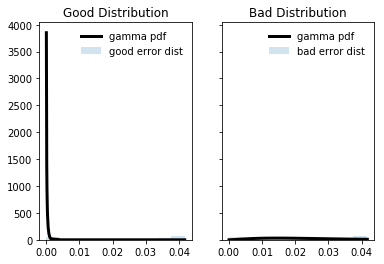

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

# x = sorted(good_dist)
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'good error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


# x = bad_dist
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'bad error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

0.002077560487917836
174


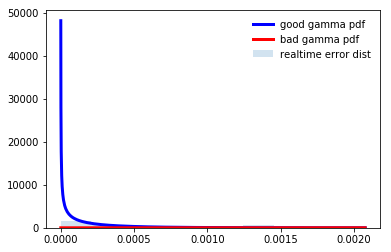

In [42]:
x = [1.095626494536718e-06, 5.6944971736611694e-06, 6.412331761696327e-07, 3.5672211533118584e-06, 1.6350995954466398e-06, 9.584056652418403e-06, 7.165032348019212e-07, 1.3182581578824494e-05, 2.925765692012961e-05, 1.915397803327228e-05, 3.2885982338030785e-05, 3.363821860893494e-05, 8.056773065410008e-05, 7.756680880376055e-05, 8.965964524909582e-05, 4.088890943722058e-05, 0.00010879149381491853, 9.900449689752772e-05, 0.0001051838651751348, 0.00013370489733587843, 0.00011583253034701936, 0.00013797026159128117, 0.00020304182031204078, 0.00017356766903967854, 0.00016713636729918469, 0.000179848851208216, 0.00021343932233999053, 0.00025168117865464535, 0.00022491895519335503, 0.0003174859696022115, 0.00024291971904666923, 0.0002921886251243578, 0.00036773180986388954, 0.0003944190708254873, 0.0004949088485653311, 0.0003379248215919339, 0.0005779928797550422, 0.0005682954887539458, 0.0006301698390537491, 0.0006947482958322075, 0.0009254737936050948, 0.0008793855712420051, 0.0010434299485282315, 0.001006206180282869, 0.0012513049557395931, 0.0011509963707931484, 0.0014117718974844707, 0.001337568981711337, 0.0013523456716959524, 0.0015281951530444686, 0.0017982132591494774, 0.001982278402736883, 0.002077560487917836, 3.441965574567977e-05, 2.6882101205871135e-05, 9.982026945316462e-06, 5.6167344444507035e-05, 1.2662691844714949e-05, 6.794779755568047e-06, 0.00010131363627116927, 8.210135534382893e-05, 0.0002782737424691246, 0.00012636950569937198, 0.00027834568823934506, 0.0003068443596411441, 0.0002724719376500435, 0.00030502978348224795, 0.00044201560585581346, 0.0005881545210169417, 0.0005370984535563067, 0.0005657842363803215, 0.0005937092168362102, 0.0006207782698927282, 0.0007058498711663437, 0.0008470535766819076, 0.0007786538198873588, 0.0009275081420431343, 0.000925127367073121, 0.0009942517993446914, 0.0010337765792607992, 0.0011121330902349052, 0.0010917279581614911, 0.0011133856593038018, 0.0010869435558666424, 0.001142034474634553, 0.0011954847330862284, 0.0012783573484170551, 0.001208642644890859, 0.001315468924151062, 0.0013112832315316436, 0.0013337458323858665, 0.0013283331984249268, 0.001353023845645551, 0.0013828585274796407, 0.0014348265390349633, 0.0014084008765713634, 0.0014956843076758379, 0.00148733955391574, 0.0014510180828025709, 0.0014999543766386668, 0.0015316248009606009, 0.001494990978638377, 0.0016366446786866393, 0.0015156662197118294, 0.0016306955794038783, 0.0015316284773862765, 0.0015485710375782505, 0.001530257055642853, 0.0014242913840071447, 0.0014714798762371388, 0.0014067272488689252, 0.0014086565855989945, 0.0014679054891772196, 0.001414929342412523, 0.001394084052264297, 0.0012832375402512112, 0.0012549001787429271, 0.0013274807107586657, 0.0011218684054711114, 0.001153534258149605, 0.001097338128318183, 0.0010535657926074807, 0.0009647697690691574, 0.0008684781854158498, 0.0008956288920080654, 0.0007155478271145791, 0.0009273678505520756, 0.0007843254635922487, 0.0008088880356214767, 0.0005000384498234755, 0.0005570952815138194, 0.0004189528431890099, 0.0004313323536924985, 0.00038337236994334526, 0.0003554721395128197, 0.0004212289507395193, 0.00028091588925608296, 0.00030196356444763445, 0.00020503181761374575, 0.00022006954042240405, 0.00022764333706674653, 0.00020987037470789058, 0.0001065831405038187, 0.00014675499696683458, 7.924557697640766e-05, 2.908189985091801e-05, 6.443647719865686e-05, 6.9368789739412e-05, 1.1672686913909887e-05, 5.582273205668418e-05, 2.7855349131870627e-06, 2.4201405972588176e-05, 1.4327774859239828e-05, 7.2143115842157065e-06, 1.2866410619501727e-05, 3.0272623144504934e-05, 5.362511468240625e-06, 5.502981556290785e-06, 2.142691057523821e-06, 2.414884864535127e-06, 0.00013484162464696072, 9.111903279748026e-05, 0.0001173112946910355, 4.469841921524974e-05, 7.193409273746023e-05, 0.00011092704193012284, 0.00010609901668515245, 0.00021110852513236682, 0.0002120869049259267, 0.0002563042295956188, 0.00044612588182323755, 0.00033164871611406364, 0.0004924712275955949, 0.00047034229534356856]
print(max(x))
print(len(x))
x = sorted(x)

fig, ax = plt.subplots()

ax.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'b-', lw=3, label='good gamma pdf')
ax.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'r-', lw=3, label='bad gamma pdf')

ax.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'realtime error dist')
ax.legend(loc='best', frameon=False)
ax.ticklabel_format(style='plain')

plt.show()

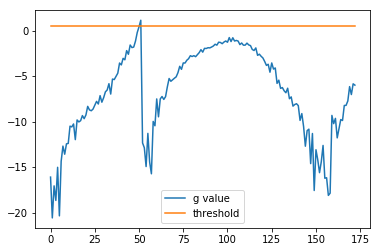

In [45]:
g_values = [-16.102509500506127, -20.585517440126083, -17.065019121207285, -18.666655997201772, -15.027678505172673, -20.358094956251946, -14.366708150118882, -12.697548592194522, -13.588063872424584, -12.44987831680902, -12.40184904508746, -10.506040701079229, -10.59063198185089, -10.266299330213855, -11.985584716367839, -9.826481769596114, -10.041904347449105, -9.903790418983647, -9.347239179633902, -9.68195657055395, -9.2731750108494, -8.333079214927409, -8.721705802674364, -8.813740140443542, -8.63453659736416, -8.207018349946509, -7.782005159101743, -8.073469580404037, -7.155755434324249, -7.874613821566697, -7.383692069932238, -6.73988597693409, -6.535330836817707, -5.840534292816471, -6.981212520186887, -5.332544792812712, -5.389393246838438, -5.0361112103473715, -4.688487459405849, -3.573047601628616, -3.783169879762738, -3.057332004057855, -3.216943805773724, -2.209370099041223, -2.6101403523779254, -1.5948896845585523, -1.8753453164654843, -1.8190145711445211, -1.1660598449992676, -0.21464008006665836, 0.4063623558377003, 1.1270236763801904, -12.353039300073732, -12.876370850755352, -14.943464654210636, -11.300570158272855, -14.450282138346445, -15.738292067644508, -9.989410530147268, -10.463920915447702, -7.5154597761881945, -9.47956503173556, -7.514765740438392, -7.2499273651402945, -7.571884578817105, -7.266226459799896, -6.193072459553491, -5.273592950576955, -5.576428908455824, -5.404211193734369, -5.241627621094068, -5.088359678240948, -4.630608591632125, -3.933900817259797, -4.262914164392498, -3.5638936111532757, -3.5746074072946215, -3.268787807007783, -3.0984667171508704, -2.769455901019114, -2.8540947818192137, -2.7642830585076297, -2.8740426497210194, -2.6466656443051875, -2.430623510202821, -2.103632535002987, -2.3780826000640616, -1.9600618269153642, -1.9761714179218757, -1.8899601500073686, -1.9106799322470636, -1.8164351883212646, -1.703463139006459, -1.508933726520695, -1.6075033936465957, -1.2845306899507989, -1.315093680231314, -1.4488828883312124, -1.2689160893875453, -1.1536167991287982, -1.2870675974244818, -0.7773572961090167, -1.2116038482215572, -0.798435447248437, -1.1536034662695158, -1.0922842616875812, -1.1585778587960078, -1.5481459310772152, -1.3733586304542769, -1.6137701391447763, -1.606546169426906, -1.3865228006224584, -1.5830857245441052, -1.6612055629940414, -2.084656484345146, -2.1952634788062255, -1.913946381338235, -2.7293190369586, -2.599819522994437, -2.83075405989689, -3.0143299360648257, -3.397926512990807, -3.83370001985071, -3.7085017504219877, -4.58046266797669, -3.5645245663292826, -4.235067699718286, -4.115687635833069, -5.807676184796662, -5.455794944461161, -6.35559947795997, -6.2676291538594455, -6.618788782693628, -6.837382146904758, -6.339294107362889, -7.4900611064276745, -7.2939333267746065, -8.308552976083263, -8.129201868242433, -8.042579670030705, -8.249716262090317, -9.87352793591964, -9.126675861594435, -10.542947147909672, -12.710287845130665, -11.000424465251342, -10.838113509549146, -14.619231851398752, -11.313960229819372, -17.57324954685231, -13.097597796857485, -14.193522664000625, -15.614661911800454, -14.417137585065007, -12.625400086540935, -16.22625806908445, -16.172993190856232, -18.111936656540934, -17.86645593766707, -9.327302633506179, -10.229899042708894, -9.652596899463902, -11.794472851233536, -10.75788847600677, -9.781789544571211, -9.883957802519149, -8.234837303639551, -8.223129887579603, -7.734150970173573, -6.164709347215421, -7.033967941166338, -5.856225508115244, -6.001029790915368]
threshold = [0.5 for x in range(len(g_values))]
plt.plot(g_values, label="g value")
plt.plot(threshold, label="threshold")
plt.legend()
plt.show()